# MoReBo
MoReBo welcomes you!

![MoReBo Logo](MoReBo.jpg)

MoReBo Logo source: https://campk12.com/project/joydeep.chanda/movie-bot

- [Context](#context)
    - [Introduction](#introduction)
    - [Background](#background)
    - [Problem Statement](#problem-statement)
    - [Goals](#goals)
    - [Approach](#approach)
- [Explorative Data Analysis](#explorative-data-analysis)
    - [Overview of Data](#overview-of-data)
    - [Data Visualization](#data-visualization)
    - [Statistical Analysis](#statistical-analysis)
    - [Hypothesis Testing](#hypothesis-testing)
- [Unifying & Transformation](#unifying--transformation)
    - [Data Integration](#data-integration)
    - [Data Transformation](#data-transformation)
    - [Data Normalization](#data-normalization)
    - [Data Scaling](#data-scaling)
- [Data Cleansing](#data-cleansing)
    - [Data Cleaning](#data-cleaning)
    - [Outlier Detection](#outlier-detection)
    - [Missing Value Imputation](#missing-value-imputation)
    - [Duplicate Removal](#duplicate-removal)
- [Analysis & Validation](#analysis--validation)
    - [Model Selection](#model-selection)
    - [Model Validation](#model-validation)
    - [Model Evaluation Metrics](#model-evaluation-metrics)
    - [Cross-Validation](#cross-validation)
- [Feature Selection & Engineering](#feature-selection--engineering)
- [Appliance in Machine Learning](#appliance-in-machine-learning)
- [Appliance of XAI-Techniques](#appliance-of-xai-techniques)

## Context

### Introduction

The goal of this project is to create a machine learning model that recommends movies to users based on their movie preferences. This model will function similarly to popular VOD providers like Netflix, Amazon Prime, and Disney Plus. To make movie recommendations, users will be required to select a minimum number of movies to be used as input to the model. Two different models, Support Vector Machine and Logistic Regression, will be evaluated to determine which is better suited for this task. Additional models may also be explored as part of this project. The final goal is to deploy the model in a user-friendly web application, which can be hosted on platforms such as heroku.com.

### Background

The rise of online streaming services has led to an explosion of movie choices for users. However, this abundance of choice can be overwhelming, and users may have difficulty finding movies that match their tastes. Machine learning models can be used to provide personalized recommendations to users, based on their movie preferences. Popular VOD providers like Netflix and Amazon Prime already use such models to make movie recommendations to their users. This project aims to create a similar model for recommending movies to users.

### Problem Statement

The problem we are trying to solve is to create a machine learning model that can accurately recommend movies to users based on their movie preferences. We want to provide users with personalized movie recommendations to make their movie-watching experience more enjoyable. To achieve this goal, we will be using Support Vector Machine and Logistic Regression models to predict which movies users will enjoy based on their movie preferences. We will evaluate the performance of these models and select the best one for the task. Finally, we will deploy the model in a user-friendly web application to make it accessible to a wide range of users.

### Installing packages based on Requirements.txt

In [1]:
# %pip install -r requirements.txt #TODO: add requirements.txt

## Explorative Data Analysis

To get enough data we are using the MovieLens 1M dataset from https://grouplens.org/datasets/movielens/. This dataset contains 1M ratings
made by 6'040 users for 3'900 movies. Additionally we aggregated our movies with metadata from omdbapi.com.

### Overview of Data

We import our data using pandas and then save the three datasets as dataframes.

In [2]:
import pandas as pd

movies = pd.read_csv('data/movies_meta_data.csv', sep=';', engine='python')
users = pd.read_csv('data/users.dat', sep='::', engine='python', names=['userId', 'gender', 'age', 'occupation', 'zip-code'])
ratings = pd.read_csv('data/ratings.dat', sep='::', engine='python', names=['userId', 'movieId', 'rating', 'timestamp'])

Now let's take a closer look at the movies dataset.

In [3]:
movies.head()

,ml_movieId,ml_title,ml_genres,Title,Year,Rated,Released,Runtime,Genre,Director,...,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,ml_year,totalSeasons
0,1,Toy Story,Animation|Children's|Comedy,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy",John Lasseter,...,"1,009,377",tt0114709,movie,23 Mar 2010,"$223,225,679",NaN,NaN,True,1995,NaN
1,2,Jumanji,Adventure|Children's|Fantasy,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family",Joe Johnston,...,"354,984",tt0113497,movie,NaN,"$100,499,940",NaN,NaN,True,1995,NaN
2,3,Grumpier Old Men,Comedy|Romance,Grumpier Old Men,1995,PG-13,22 Dec 1995,101 min,"Comedy, Romance",Howard Deutch,...,"28,520",tt0113228,movie,15 May 2007,"$71,518,503",NaN,NaN,True,1995,NaN
3,4,Waiting to Exhale,Comedy|Drama,Waiting to Exhale,1995,R,22 Dec 1995,124 min,"Comedy, Drama, Romance",Forest Whitaker,...,"11,434",tt0114885,movie,20 Jul 1999,"$67,052,156",NaN,NaN,True,1995,NaN
4,5,Father of the Bride Part II,Comedy,Father of the Bride Part II,1995,PG,08 Dec 1995,106 min,"Comedy, Family, Romance",Charles Shyer,...,"39,573",tt0113041,movie,25 Jan 2005,"$76,594,107",NaN,NaN,True,1995,NaN


The dataset from movielens contains movies with the following 3 columns:
- MovieID: ID which movielens gave the movie
- Genres: A pipe seperated list of genres
- Titles: The title of the movie which corresponds to the title in IMDB. The title also includes the release year in brackets.
    
As this dataset lacks additional data we decided to aggregate it using data provided by omdbapi.com. This API can be queried with
a movie title and a year. The result contains additional data like the director, actors, ratings from IMDB. To fetch the data from the 
API we wrote and executed the script "get_meta_data.py" residing in this directory. The script reads all movies from our original movielens
dataset and queries the API using the title and the year. The results are saved to a new .csv file called movies_meta_data.csv. The new
dataset contains our original columns plus the new ones from omdbapi.com. Some movies were not found on omdbapi.com. These movies are
saved to the not_found_movies.csv file so they could be added manually. 
How much of the additional data is relevant will be examined at a later stage.

In [4]:
users.head()

,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


The users dataset contains 5 columns.

-   userID: Helps to identify the user which rated the movie


-   gender: Shows the gender of the user


-   age: Gives the age group of the user. There are the following age groups:

    -   1 = 0-17
    -   18 = 18-24
    -   25 = 25-34
    -   35 = 35-44
    -   45 = 45-49
    -   50 = 50-55
    -   56 = 56+
    

     </p>

-   occupation: Display the occupation of the users. Here are the 20 different occupations:

    -   0:  other or not specified
    -   1:  academic/educator
    -   2:  artist
    -   3:  clerical/admin
    -   4:  college/grad student
    -   5:  customer service
    -   6:  doctor/health care
    -   7:  executive/managerial
    -   8:  farmer
    -   9:  homemaker
    -   10: K-12 student
    -   11: lawyer
    -   12: programmer
    -   13: retired
    -   14: sales/marketing
    -   15: scientist
    -   16: self-employed
    -   17: technician/engineer
    -   18: tradesman/craftsman
    -   19: unemployed
    -   20: writer
    </p>

-   zip-code: US-Zip-Codes from the village/city the user lives in 

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


The ratings dataset contains 4 columns.

- userId: Shows the userID which User gave the rating

- movieId: Shows the movieId from the rated movie

- rating: Shows the given rating, which is in range between 0-5

- timestamp: Shows the timestamp in seconds since the epoch as returned by time

### Data Visualization

Introduction text TODO

Explain Genres TODO

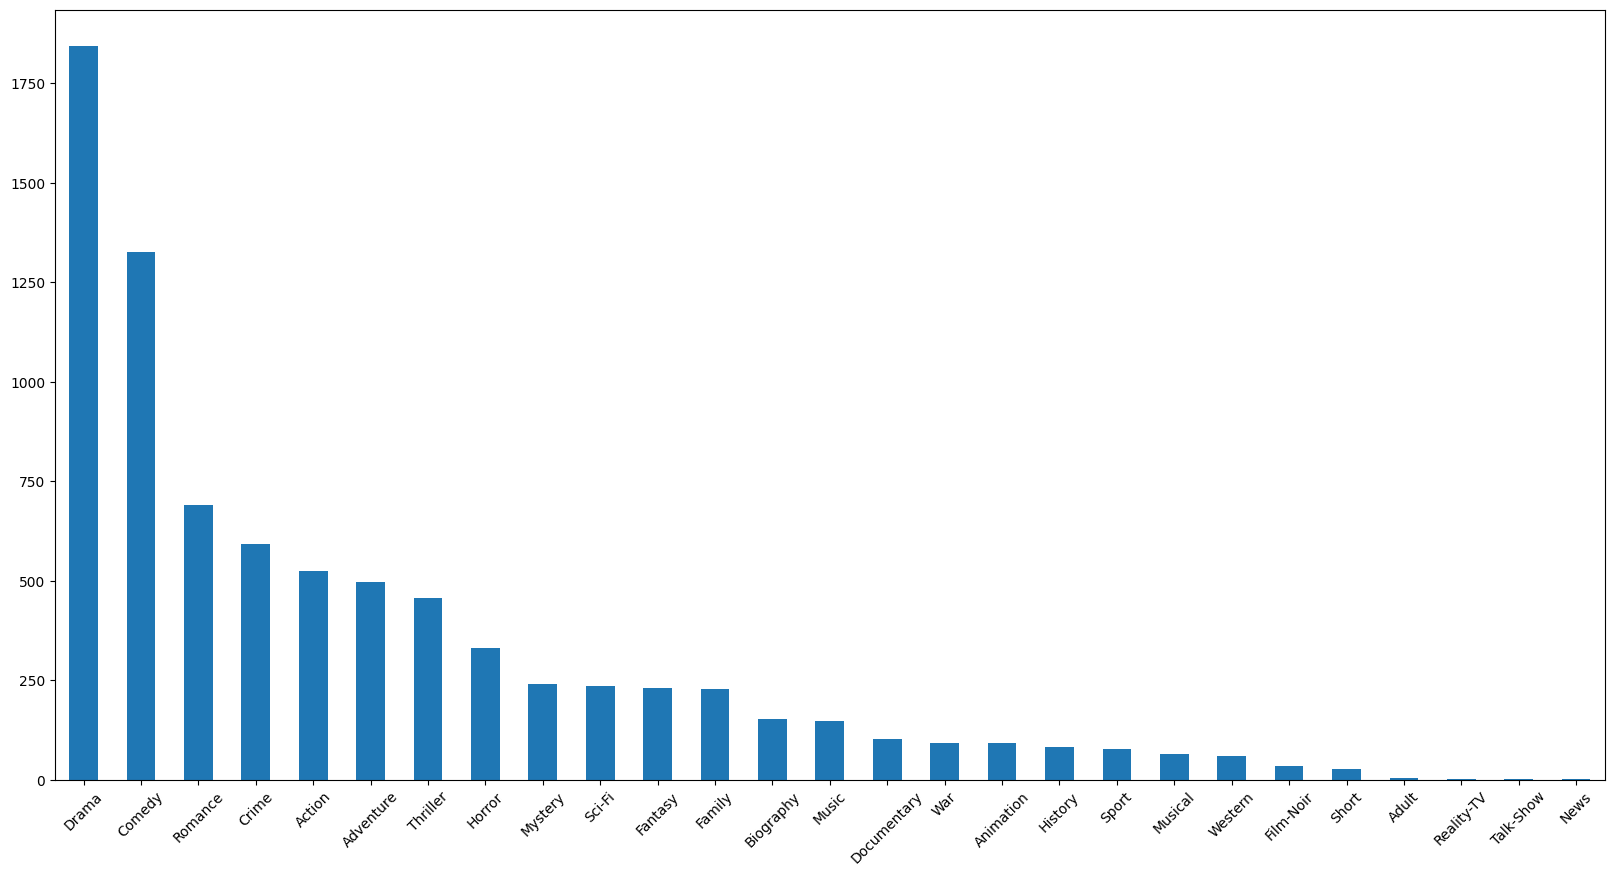

In [6]:
import matplotlib.pyplot as plt

# Create a barchart for the number of movies for every genre
movies['Genre'].str.get_dummies(sep=', ').sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

Explain TODO

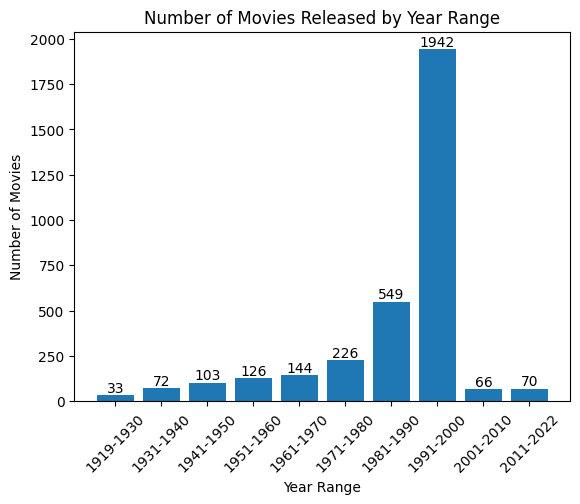

In [7]:
# define a custom function to map each year to its corresponding year range
def year_to_range(year):
    if isinstance(year, str):
        # extract the first four characters from the year string
        year = int(year[:4])
    if year >= 1919 and year <= 1930:
        return '1919-1930'
    elif year >= 1931 and year <= 1940:
        return '1931-1940'
    elif year >= 1941 and year <= 1950:
        return '1941-1950'
    elif year >= 1951 and year <= 1960:
        return '1951-1960'
    elif year >= 1961 and year <= 1970:
        return '1961-1970'
    elif year >= 1971 and year <= 1980:
        return '1971-1980'
    elif year >= 1981 and year <= 1990:
        return '1981-1990'
    elif year >= 1991 and year <= 2000:
        return '1991-2000'
    elif year >= 2001 and year <= 2010:
        return '2001-2010'
    elif year >= 2011 and year <= 2022:
        return '2011-2022'

# create a new column in the dataframe to group the years into year ranges
movies['Year Range'] = movies['Year'].apply(year_to_range)

# use pandas value_counts function to count the number of movies in each year range
movies_per_year_range = movies['Year Range'].value_counts().sort_index()

# create a bar chart using matplotlib
plt.bar(movies_per_year_range.index, movies_per_year_range.values)

# add labels to the bars
for i, value in enumerate(movies_per_year_range.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# set the chart title and axis labels
plt.title('Number of Movies Released by Year Range')
plt.xlabel('Year Range')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# display the chart
plt.show()

Explain TODO

Explain TODO

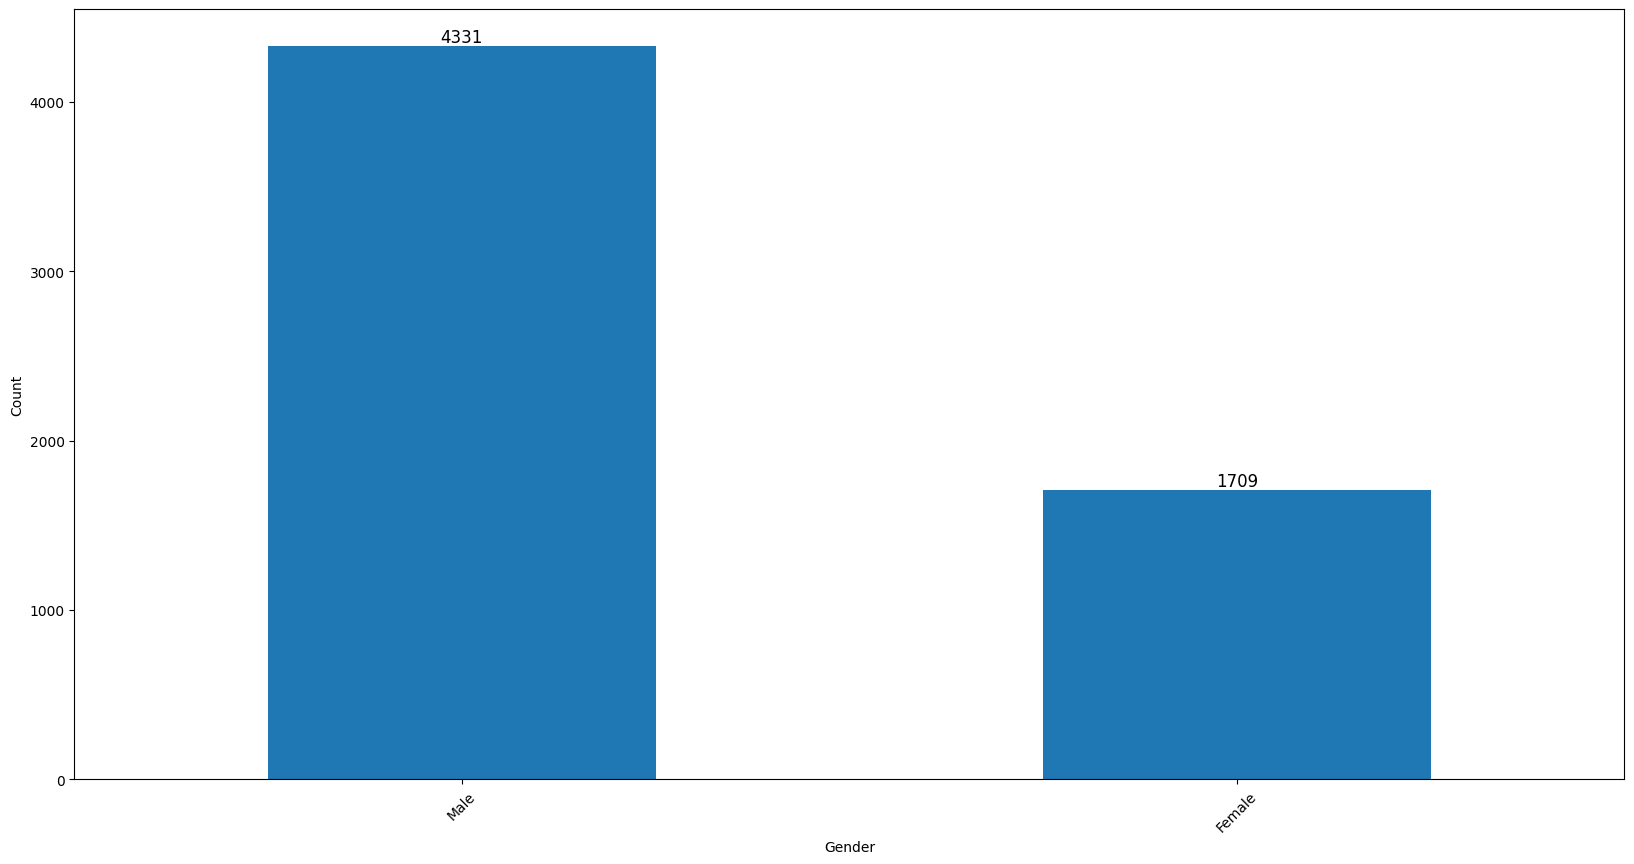

In [8]:
# Map gender codes to labels
gender_labels = {'M': 'Male', 'F': 'Female'}

# Create a barchart for the genders in the users dataframe
ax = users['gender'].map(gender_labels).value_counts().plot(kind='bar', figsize=(20,10))

# Set the x- and y-axis labels
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(users['gender'].map(gender_labels).value_counts()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

plt.xticks(rotation=45)
plt.show()

Explain TODO

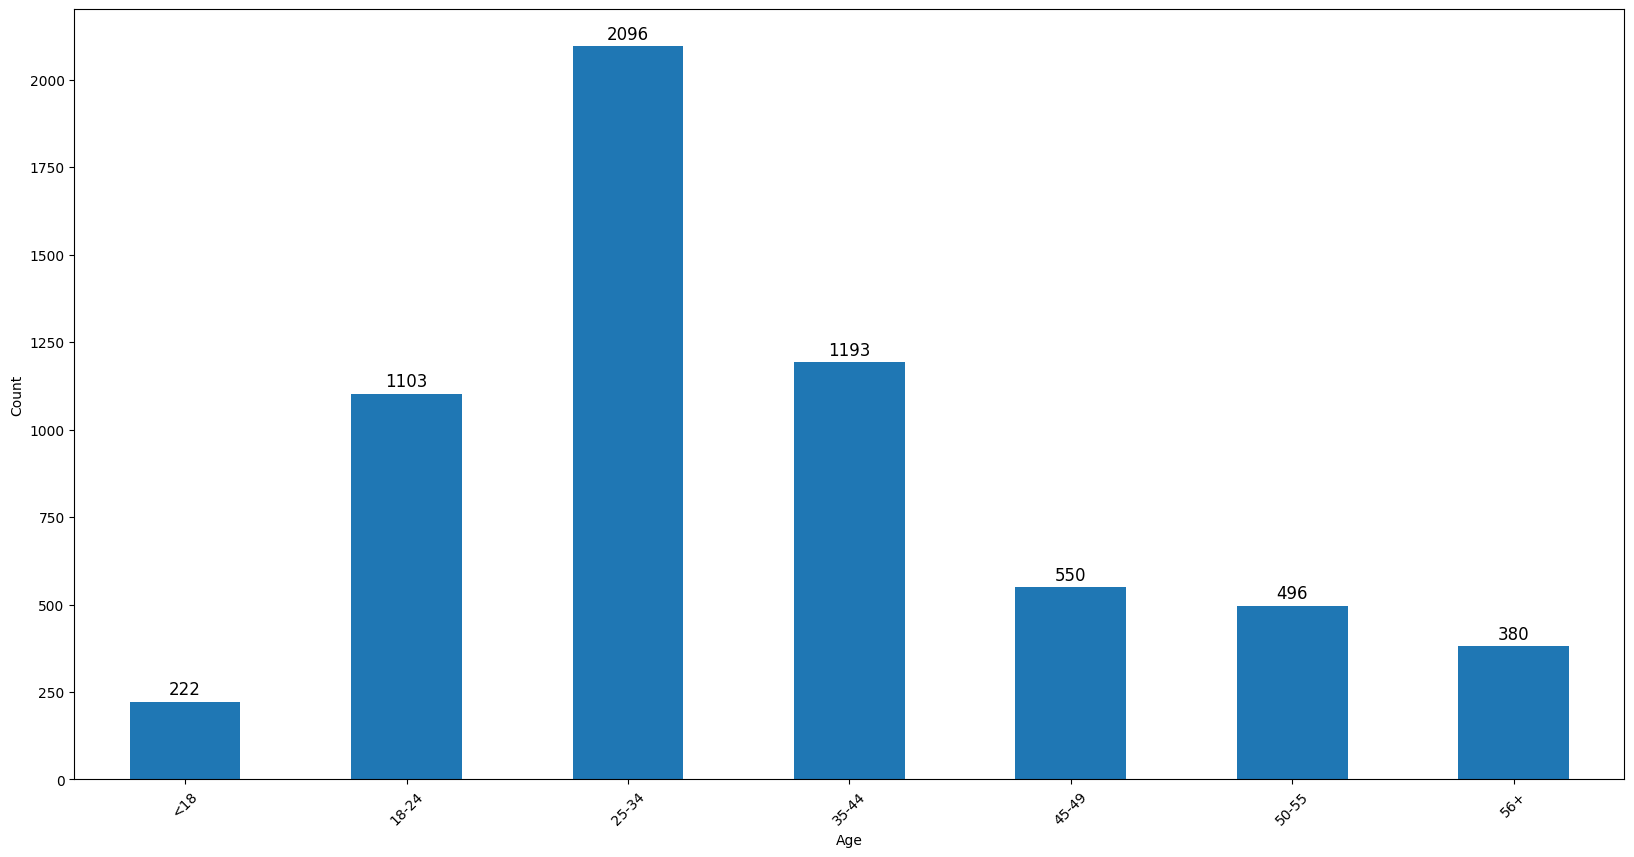

In [9]:
# Define the age categories
age_categories = ['<18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']

# Create a barchart for the ages in the users dataframe
ax = users['age'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Set the x-axis labels to the age categories
ax.set_xticklabels(age_categories)

# Set the x- and y-axis labels
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(users['age'].value_counts().sort_index()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)
    
plt.xticks(rotation=45)
plt.show()

Explain TODO

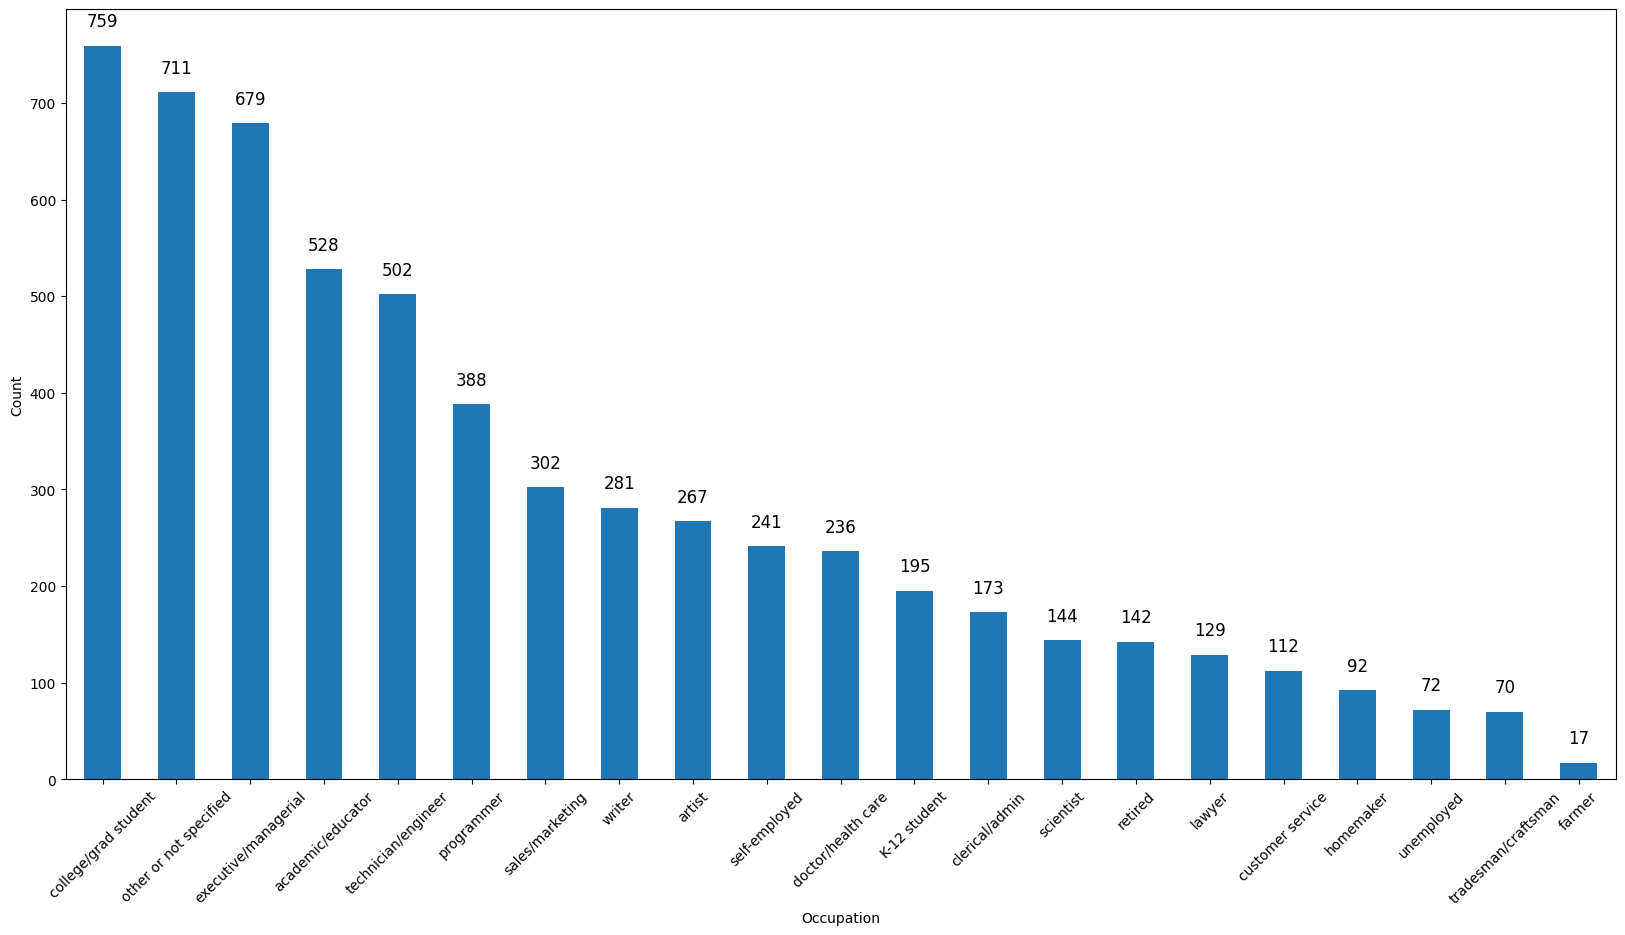

In [10]:
# Define a dictionary to map numeric occupation values to text labels
occupation_labels = {0: "other or not specified",
                     1: "academic/educator",
                     2: "artist",
                     3: "clerical/admin",
                     4: "college/grad student",
                     5: "customer service",
                     6: "doctor/health care",
                     7: "executive/managerial",
                     8: "farmer",
                     9: "homemaker",
                     10: "K-12 student",
                     11: "lawyer",
                     12: "programmer",
                     13: "retired",
                     14: "sales/marketing",
                     15: "scientist",
                     16: "self-employed",
                     17: "technician/engineer",
                     18: "tradesman/craftsman",
                     19: "unemployed",
                     20: "writer"}

# Replace the numeric occupation values with text labels using the map method
users_plt = users.copy()
users_plt['occupation'] = users_plt['occupation'].map(occupation_labels)

# Plot a bar chart of the occupations in the users dataframe
fig, ax = plt.subplots(figsize=(20, 10))
users_plt['occupation'].value_counts().plot(kind='bar', ax=ax)

# Add annotations for the count above each bar
for i, v in enumerate(users_plt['occupation'].value_counts()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

# Set the x- and y-axis labels
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')

plt.xticks(rotation=45)
plt.show()

Explain TODO

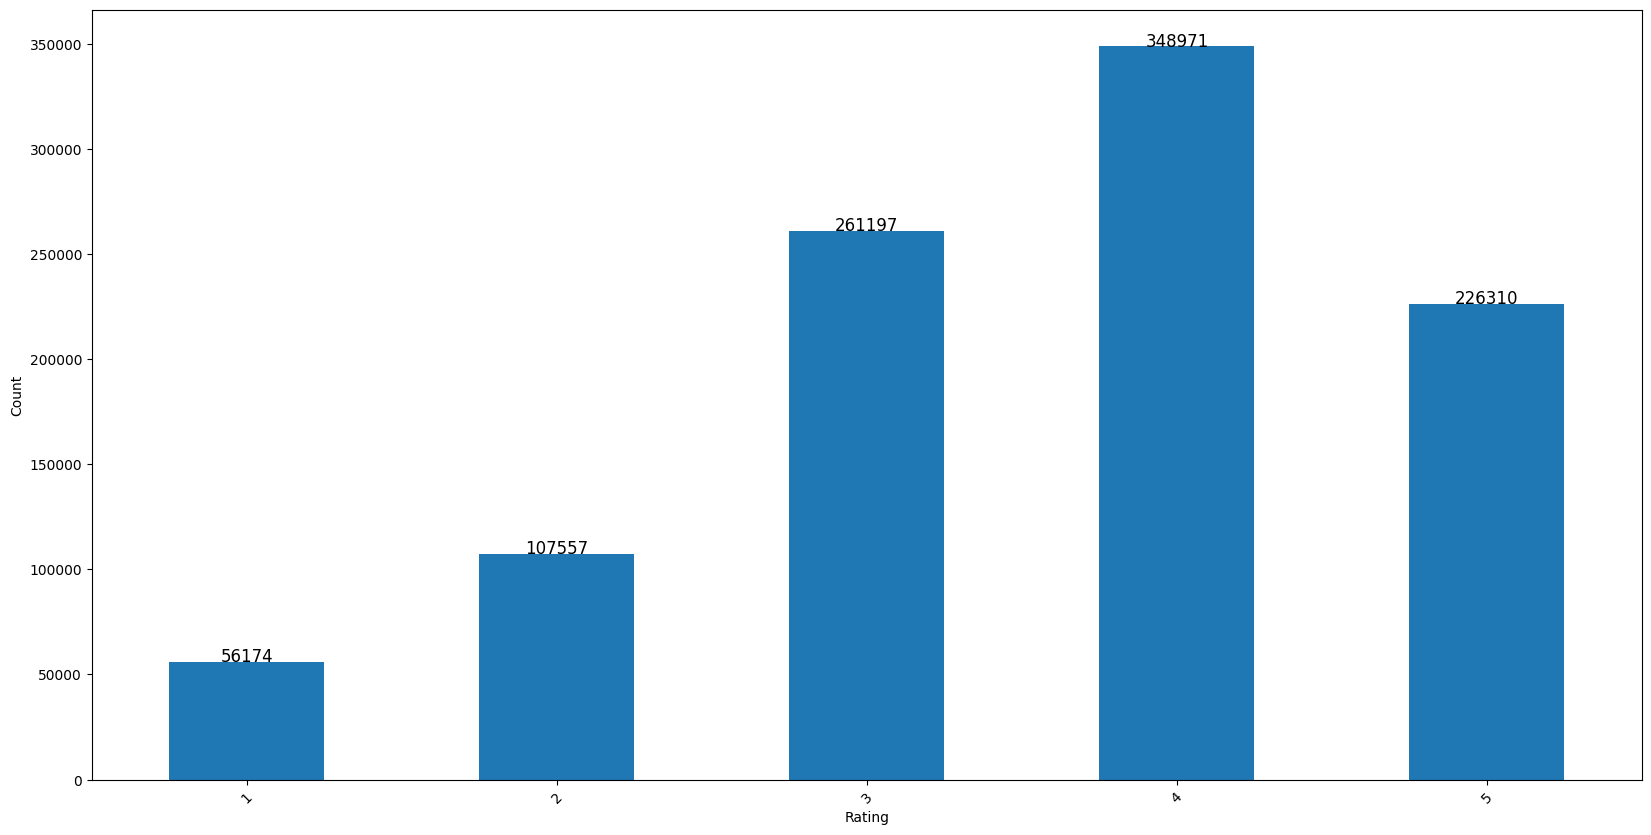

In [11]:
#create a barchart for the ratings in the ratings dataframe
ax = ratings['rating'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Set the x- and y-axis labels
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(ratings['rating'].value_counts().sort_index()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

plt.xticks(rotation=45)
plt.show()


TODO Plot 3x2 grid

Final explanation TODO

### Statistical Analysis

### Hypothesis Testing

## Unifying & Transformation

### Data Transformation

Explanation TODO

In [12]:
# Define a dictionary to map numeric occupation values to text labels
occupation_labels = {0: "other or not specified",
                     1: "academic/educator",
                     2: "artist",
                     3: "clerical/admin",
                     4: "college/grad student",
                     5: "customer service",
                     6: "doctor/health care",
                     7: "executive/managerial",
                     8: "farmer",
                     9: "homemaker",
                     10: "K-12 student",
                     11: "lawyer",
                     12: "programmer",
                     13: "retired",
                     14: "sales/marketing",
                     15: "scientist",
                     16: "self-employed",
                     17: "technician/engineer",
                     18: "tradesman/craftsman",
                     19: "unemployed",
                     20: "writer"}

# Replace the numeric occupation values with text labels using the map method
users['occupation'] = users['occupation'].map(occupation_labels)

In [40]:
missing_values_movies = movies.isnull().any()

missing_cols_mov = movies.columns[missing_values_movies]

print(missing_cols_mov)

Index(['Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors',
       'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Metascore',
       'imdbRating', 'imdbVotes', 'DVD', 'BoxOffice', 'Production', 'Website',
       'totalSeasons'],
      dtype='object')


In [6]:
import re

# Fill missing 'imdbRating' values with the mean
movies['imdbRating'].fillna(movies['imdbRating'].mean(), inplace=True)

# Round the 'imdbRating' values to one decimal place
movies['imdbRating'] = movies['imdbRating'].round(decimals=1)

# Convert the 'imdbVotes' column to float type using regular expressions
movies['imdbVotes'] = movies['imdbVotes'].apply(lambda x: float(re.sub(r'[^\d.]', '', x)) if isinstance(x, str) else x)

# Fill in missing values with mean
movies['imdbVotes'].fillna(movies['imdbVotes'].mean(), inplace=True)

# Round the 'imdbVotes' values to zero decimal places
movies['imdbVotes'] = movies['imdbVotes'].round(decimals=0)

# Convert the 'BoxOffice' column to float type using regular expressions
movies['BoxOffice'] = movies['BoxOffice'].apply(lambda x: float(re.sub(r'[^\d.]', '', x)) if isinstance(x, str) else x)

# Fill in missing values with mean
movies['BoxOffice'].fillna(movies['BoxOffice'].mean(), inplace=True)

#Round the 'BoxOffice' values to zero decimal places
movies['BoxOffice'] = movies['BoxOffice'].round(decimals=0)

# Convert the 'Runtime' column from minutes to hours
movies['Runtime'] = movies['Runtime'].apply(lambda x: int(re.sub(r'\D', '', x)) / 60 if isinstance(x, str) else x)

# Fill in missing values with mean
movies['Runtime'].fillna(movies['Runtime'].mean(), inplace=True)

# Round the 'Runtime' values to zero decimal places
movies['Runtime'] = movies['Runtime'].round(decimals=0)

In [ ]:
import re

# Fill missing 'imdbRating' values with the mean
movies_dropped['imdbRating'].fillna(movies_dropped['imdbRating'].mean(), inplace=True)

# Round the 'imdbRating' values to one decimal place
movies_dropped['imdbRating'] = movies_dropped['imdbRating'].round(decimals=1)

# Convert the 'imdbVotes' column to float type using regular expressions
movies_dropped['imdbVotes'] = movies_dropped['imdbVotes'].apply(lambda x: float(re.sub(r'[^\d.]', '', x)) if isinstance(x, str) else x)

# Fill in missing values with mean
movies_dropped['imdbVotes'].fillna(movies_dropped['imdbVotes'].mean(), inplace=True)

# Round the 'imdbVotes' values to zero decimal places
movies_dropped['imdbVotes'] = movies_dropped['imdbVotes'].round(decimals=0)

# Convert the 'BoxOffice' column to float type using regular expressions
movies_dropped['BoxOffice'] = movies_dropped['BoxOffice'].apply(lambda x: float(re.sub(r'[^\d.]', '', x)) if isinstance(x, str) else x)

# Fill in missing values with mean
movies_dropped['BoxOffice'].fillna(movies_dropped['BoxOffice'].mean(), inplace=True)

# Round the 'BoxOffice' values to zero decimal places
movies_dropped['BoxOffice'] = movies_dropped['BoxOffice'].round(decimals=0)

# Convert the 'Runtime' column from minutes to hours
movies_dropped['Runtime'] = movies_dropped['Runtime'].apply(lambda x: int(re.sub(r'\D', '', x)) / 60 if isinstance(x, str) else x)

# Fill in missing values with mean
movies_dropped['Runtime'].fillna(movies_dropped['Runtime'].mean(), inplace=True)

# Round the 'Runtime' values to zero decimal places
movies_dropped['Runtime'] = movies_dropped['Runtime'].round(decimals=0)


In [42]:
missing_values_movies = movies.isnull().any()

missing_cols_mov = movies.columns[missing_values_movies]

print(missing_cols_mov)

Index(['Rated', 'Released', 'Genre', 'Director', 'Writer', 'Actors', 'Plot',
       'Language', 'Country', 'Awards', 'Poster', 'DVD', 'Production',
       'Website', 'totalSeasons'],
      dtype='object')


In [4]:
movies['Metascore']
max_score = movies['Metascore'].max()
min_score = movies['Metascore'].min()

print(max_score, "  ", min_score)

100.0    1.0


In [56]:
count_NaN = movies.isna().sum()

count_NaN

ml_movieId         0
ml_title           0
ml_genres          0
Title              0
Year               0
Rated            145
Released          26
Runtime           12
Genre              3
Director          38
Writer            72
Actors            10
Plot              22
Language           6
Country            5
Awards           683
Poster            26
Ratings            0
Metascore       1189
imdbRating        20
imdbVotes         19
imdbID             0
Type               0
DVD              318
BoxOffice        716
Production      3168
Website         3331
Response           0
ml_year            0
totalSeasons    3305
dtype: int64

In [ ]:
count_Genre_rows = movies['Genre'].isna().sum()
count_Genre_rows

In [43]:
for index, row in movies.iterrows():
    if pd.isna(row['Genre']):
        movies.drop(index, inplace=True)

In [44]:
missing_values_movies = movies.isnull().any()

missing_cols_mov = movies.columns[missing_values_movies]

print(missing_cols_mov)

Index(['Rated', 'Released', 'Director', 'Writer', 'Actors', 'Plot', 'Language',
       'Country', 'Awards', 'Poster', 'DVD', 'Production', 'Website',
       'totalSeasons'],
      dtype='object')


In [47]:
drop_na = pd.DataFrame()
drop_na = movies[movies['Rated'].isna()]
drop_na.to_csv('data/drop_na.csv', index=False)

In [48]:
movies.drop(['Rated', 'Director', 'Writer', 'Actors', 'Plot', 'Language',
       'Country', 'Awards', 'Poster', 'DVD', 'Production', 'Website',
       'totalSeasons'] , axis=1, inplace=True)

In [49]:
missing_values_movies = movies.isnull().any()

missing_cols_mov = movies.columns[missing_values_movies]

print(missing_cols_mov)

Index(['Released'], dtype='object')


In [50]:
drop_na = pd.DataFrame()
drop_na = movies[movies['Released'].isna()]
drop_na.to_csv('data/drop_na.csv', index=False)

In [37]:
# Create dummy variables for the genres
movies = movies.join(movies['Genre'].str.get_dummies(sep=', '))
movies.head()

,ml_movieId,ml_title,ml_genres,Title,Year,Rated,Released,Runtime,Genre,Director,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,Toy Story,Animation|Children's|Comedy,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy",John Lasseter,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children's|Fantasy,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family",Joe Johnston,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,Grumpier Old Men,1995,PG-13,22 Dec 1995,101 min,"Comedy, Romance",Howard Deutch,...,0,0,1,0,0,0,0,0,0,0
3,4,Waiting to Exhale,Comedy|Drama,Waiting to Exhale,1995,R,22 Dec 1995,124 min,"Comedy, Drama, Romance",Forest Whitaker,...,0,0,1,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,Comedy,Father of the Bride Part II,1995,PG,08 Dec 1995,106 min,"Comedy, Family, Romance",Charles Shyer,...,0,0,1,0,0,0,0,0,0,0


### Data Integration

Explanation TODO

In [32]:
# Merge the data
merged = pd.merge(movies, ratings, left_on='ml_movieId', right_on='movieId', how='inner')
merged = pd.merge(merged, users, on='userId', how='inner')
merged.head()

,ml_movieId,ml_title,ml_genres,Title,Year,Rated,Released,Runtime,Genre,Director,...,War,Western,userId,movieId,rating,timestamp,gender,age,occupation,zip-code
0,1,Toy Story,Animation|Children's|Comedy,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy",John Lasseter,...,0,0,1,1,5,978824268,F,1,K-12 student,48067
1,48,Pocahontas,Animation|Children's|Musical|Romance,Pocahontas,1995,G,23 Jun 1995,81 min,"Animation, Adventure, Drama","Mike Gabriel, Eric Goldberg",...,0,0,1,48,5,978824351,F,1,K-12 student,48067
2,150,Apollo 13,Drama,Apollo 13,1995,PG,30 Jun 1995,140 min,"Adventure, Drama, History",Ron Howard,...,0,0,1,150,5,978301777,F,1,K-12 student,48067
3,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,Star Wars: Episode IV - A New Hope,1977,PG,25 May 1977,121 min,"Action, Adventure, Fantasy",George Lucas,...,0,0,1,260,4,978300760,F,1,K-12 student,48067
4,527,Schindler's List,Drama|War,Schindler's List,1993,R,04 Feb 1994,195 min,"Biography, Drama, History",Steven Spielberg,...,0,0,1,527,5,978824195,F,1,K-12 student,48067


TODO

### Data Normalization

### Data Scaling

## Data Cleansing

### Data Cleaning

### Outlier Detection

In [ ]:
import numpy as np

# Calculate z-scores for each value in 'imdbRating' column
z_scores = np.abs((movies_dropped['imdbRating'] - movies_dropped['imdbRating'].mean()) / movies_dropped['imdbRating'].std())

# Set a threshold for identifying outliers (3 standard deviations from the mean)
threshold = 3

# Identify outliers as values with z-scores greater than the threshold
outliers = movies_dropped[z_scores > threshold]

# Count the number of movies with outliers
num_outliers = outliers.shape[0]

# Display the outliers and the count
print("Outliers:")
#print(outliers)
print("Number of movies with outliers:", num_outliers)


In [ ]:
# Calculate z-scores for each value in 'Runtime' column
z_scores = np.abs((movies_dropped['Runtime'] - movies_dropped['Runtime'].mean()) / movies_dropped['Runtime'].std())

# Set a threshold for identifying outliers (3 standard deviations from the mean)
threshold = 3

# Identify outliers as values with z-scores greater than the threshold
outliers = movies_dropped[z_scores > threshold]

# Count the number of movies with outliers
num_outliers = outliers.shape[0]

# Display the outliers and the count
print("Outliers:")
#print(outliers)
print("Number of movies with outliers:", num_outliers)


In [ ]:
# Calculate z-scores for each value in 'timestamp' column
z_scores = np.abs((movies_dropped['timestamp'] - movies_dropped['timestamp'].mean()) / movies_dropped['timestamp'].std())

# Set a threshold for identifying outliers (3 standard deviations from the mean)
threshold = 3

# Identify outliers as values with z-scores greater than the threshold
outliers = movies_dropped[z_scores > threshold]

# Count the number of movies with outliers
num_outliers = outliers.shape[0]

# Display the outliers and the count
print("Outliers:")
#print(outliers)
print("Number of movies with outliers:", num_outliers)


In [ ]:
# Calculate z-scores for each value in 'BoxOffice' column
z_scores = np.abs((movies_dropped['BoxOffice'] - movies_dropped['BoxOffice'].mean()) / movies_dropped['BoxOffice'].std())

# Set a threshold for identifying outliers (3 standard deviations from the mean)
threshold = 3

# Identify outliers as values with z-scores greater than the threshold
outliers = movies_dropped[z_scores > threshold]

# Count the number of movies with outliers
num_outliers = outliers.shape[0]

# Display the outliers and the count
print("Outliers:")
#print(outliers)
print("Number of movies with outliers:", num_outliers)

In [ ]:
# Calculate z-scores for each value in 'imdbVotes' column
z_scores = np.abs((movies_dropped['imdbVotes'] - movies_dropped['imdbVotes'].mean()) / movies_dropped['imdbVotes'].std())

# Set a threshold for identifying outliers (3 standard deviations from the mean)
threshold = 3

# Identify outliers as values with z-scores greater than the threshold
outliers = movies_dropped[z_scores > threshold]

# Count the number of movies with outliers
num_outliers = outliers.shape[0]

# Display the outliers and the count
print("Outliers:")
#print(outliers)
print("Number of movies with outliers:", num_outliers)

### Missing Value Imputation

In [26]:
missing_values = merged.isnull().any()

missing_cols = merged.columns[missing_values]

print(missing_cols)

print(merged.loc[0:3,'BoxOffice'])

Index(['Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors',
       'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Metascore',
       'imdbRating', 'imdbVotes', 'DVD', 'BoxOffice', 'Production', 'Website',
       'totalSeasons'],
      dtype='object')
0    $223,225,679
1    $141,579,773
2    $173,837,933
3    $460,998,507
Name: BoxOffice, dtype: object


In [38]:
drop_na = pd.DataFrame()
drop_na = movies[movies['Genre'].isna()]

In [39]:
drop_na = pd.DataFrame()
drop_na = movies[movies['Genre'].isna()]
drop_na.to_csv('data/drop_na.csv', index=False)

      ml_movieId           ml_title            ml_genres              Title  \
398          465     Heaven & Earth     Action|Drama|War             Heaven   
639          770        Costa Brava                Drama        Costa Brava   
1305        1568  MURDER and murder  Crime|Drama|Mystery  MURDER and murder   

      Year    Rated     Released  Runtime Genre             Director  ...  \
398   1993      NaN          NaN   83 min   NaN            Petar Zec  ...   
639   1946      NaN          NaN   77 min   NaN  Julio de Fleischner  ...   
1305  1996  Unrated  20 Jun 1997  113 min   NaN        Yvonne Rainer  ...   

     News Reality-TV Romance Sci-Fi Short Sport Talk-Show Thriller  War  \
398     0          0       0      0     0     0         0        0    0   
639     0          0       0      0     0     0         0        0    0   
1305    0          0       0      0     0     0         0        0    0   

      Western  
398         0  
639         0  
1305        0  

[3 rows 

In [23]:

missing_cols = merged.columns[missing_values]

print(missing_cols)

print(merged.loc[0:3,'Rated'])

Index(['Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors',
       'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Metascore',
       'imdbRating', 'imdbVotes', 'DVD', 'BoxOffice', 'Production', 'Website',
       'totalSeasons'],
      dtype='object')
0     G
1     G
2    PG
3    PG
Name: Rated, dtype: object


### Duplicate Removal

In [ ]:
merged.drop(['ml_title', 'ml_genres', 'DVD', 'Language'], axis=1, inplace=True)


## Analysis & Validation

### Model Selection

https://towardsdatascience.com/movielens-1m-deep-dive-part-ii-tensorflow-recommenders-4ca358cc886e

### Model Validation

### Model Evaluation Metrics

### Cross-Validation

## Feature Selection & Engineering

## Appliance in Machine Learning

## Appliance of XAI-Techniques